In [31]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Activation, Dropout, BatchNormalization,LeakyReLU,Flatten


In [33]:
y=np.loadtxt("/content/drive/My Drive/my_y2.txt")


In [34]:
y.shape

(18717,)

In [35]:
X=np.loadtxt("/content/drive/My Drive/my_X1.txt",delimiter=',')


In [36]:
X.shape

(18717, 3)

In [37]:
X

array([[7.16346154e-01, 7.33121577e-01, 7.31782576e-01],
       [4.13223140e-02, 4.60624071e-02, 4.33908393e-02],
       [2.02020202e-02, 6.25000000e-03, 4.79817669e-04],
       ...,
       [5.95238095e-03, 1.14942529e-03, 2.99463960e-05],
       [2.02020202e-02, 6.25000000e-03, 7.19726504e-04],
       [4.69135802e-01, 4.66196498e-01, 4.57624245e-01]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14973, 3), (3744, 3), (14973,), (3744,))

In [40]:
model = Sequential()
model.add(Dense(200, input_dim=3, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.005, momentum=0.9)

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.5)


Epoch 1/100
150/150 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.6314 - val_loss: 0.5262 - val_accuracy: 0.6518
Epoch 2/100
150/150 [==============================] - 0s 3ms/step - loss: 0.5206 - accuracy: 0.7177 - val_loss: 0.5124 - val_accuracy: 0.7409
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7394 - val_loss: 0.5097 - val_accuracy: 0.7417
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5109 - accuracy: 0.7430 - val_loss: 0.5076 - val_accuracy: 0.7441
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7449 - val_loss: 0.5067 - val_accuracy: 0.7417
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5081 - accuracy: 0.7486 - val_loss: 0.5057 - val_accuracy: 0.7434
Epoch 7/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7461 - val_loss: 0.5048 - val_accuracy: 0.7474

In [41]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

117/117 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.8136
test loss, test acc: [0.43631985783576965, 0.8135683536529541]


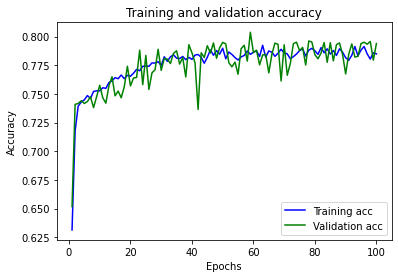

<Figure size 432x288 with 0 Axes>

In [42]:
# Plotting Results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.title('Training and validation accuracy')
plt.legend()
fig = plt.figure()
#fig.savefig('acc.png')


In [46]:


def Transf(file1,file2):
    f1= open(file1, "r")
    L=[]
    for line in f1 :
      #print(line.split())
      l = [int(x) for x in line.split()]
      L.append(l)
    a=[[round(i[0],5),round(i[1],5)] for i in L]
    nb_sommet=a[0][0]
    a=a[1:]

      #x adjacency matrix
    x=np.zeros((nb_sommet,nb_sommet))
    for i in a:
      x[i[0]][i[1]]=1
      x[i[1]][i[0]]=1

    x= x.astype(int)

    deg=[]
    sup=[]
    sup2=[]
    for i in range(nb_sommet):
      d=0
      for j in range (nb_sommet):
        if x[i][j]==1:
          d=d+1
      deg.append(d)

    for i in range(nb_sommet):
      s=0
      for j in range (nb_sommet):
        if x[i][j]==1:
          s=s+deg[j]
      sup.append(s)

    for i in range(nb_sommet):
      s2=0
      for j in range (nb_sommet):
        if x[i][j]==1:
          s2=s2+sup[j]
      sup2.append(s2)


    M=[]
    for i in range (nb_sommet):
      M.append([deg[i],sup[i],sup2[i]])
    X1=np.array([np.array(xi) for xi in M])
    x1 = X1 / X1.max(axis=0)


    f2= open(file2, "r")
    y1=[]
    for line in f2 :
      y1.append(int(line) )

    l=[0 for i in range(nb_sommet)]
    for i in y1 :
       l[i]=1
    Y1=np.asarray(l)

    return(x1,Y1)



In [47]:
files=["er100.txt","er200.txt","er1000.txt","er5000.txt","ba100.txt","ba200.txt","ba1000.txt","ba5000.txt","cora.txt","citeseer.txt","web-edu.txt","web-spam.txt","road-minnesota.txt","bio_yeast.txt","bio_SC.txt","rt_damascus.txt","soc-wiki-vote.txt","socfb-bowdoin47.txt","dimacs15.txt","dimacs.txt"]

In [48]:
Prob=[]
for f in files:
  x1,y1=Transf(f,"y_"+f)
  results = model.evaluate(x1,y1)
  Prob.append(results[1])
  print(f,results[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7600
er100.txt 0.7599999904632568
7/7 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7950
er200.txt 0.7950000166893005
32/32 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8880
er1000.txt 0.8880000114440918
157/157 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.8982
er5000.txt 0.8981999754905701
4/4 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6300
ba100.txt 0.6299999952316284
7/7 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.5900
ba200.txt 0.5899999737739563
32/32 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7310
ba1000.txt 0.7310000061988831
157/157 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5606
ba5000.txt 0.5605999827384949
85/85 [==============================] - 0s 1ms/step - loss: 0.6191 - ac

In [ ]:
 np.savetxt("p_er5000_2.txt",model.predict_proba(x1),delimiter=',');